# [快速指南](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)



In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 简单示例

- 图形画在`Figure`上面，里面含若干个`Axes`对象；
- `Axes`是一块由x-y坐标定义的区域
- 生成一个带有`Axes`的`Figure`的最简单方法是用`pyplot.subplots`
- 然后用`Axes.plot`将数据画在`Axes`上面。

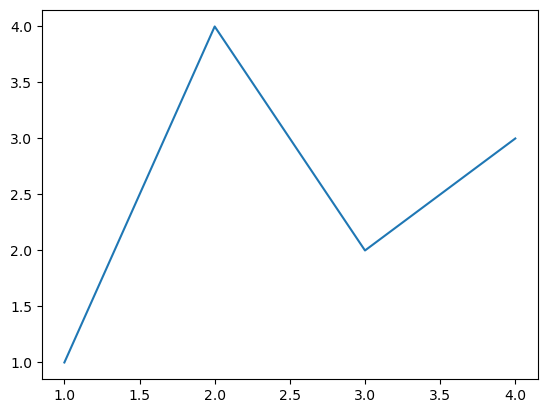

In [8]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

## 图的组成
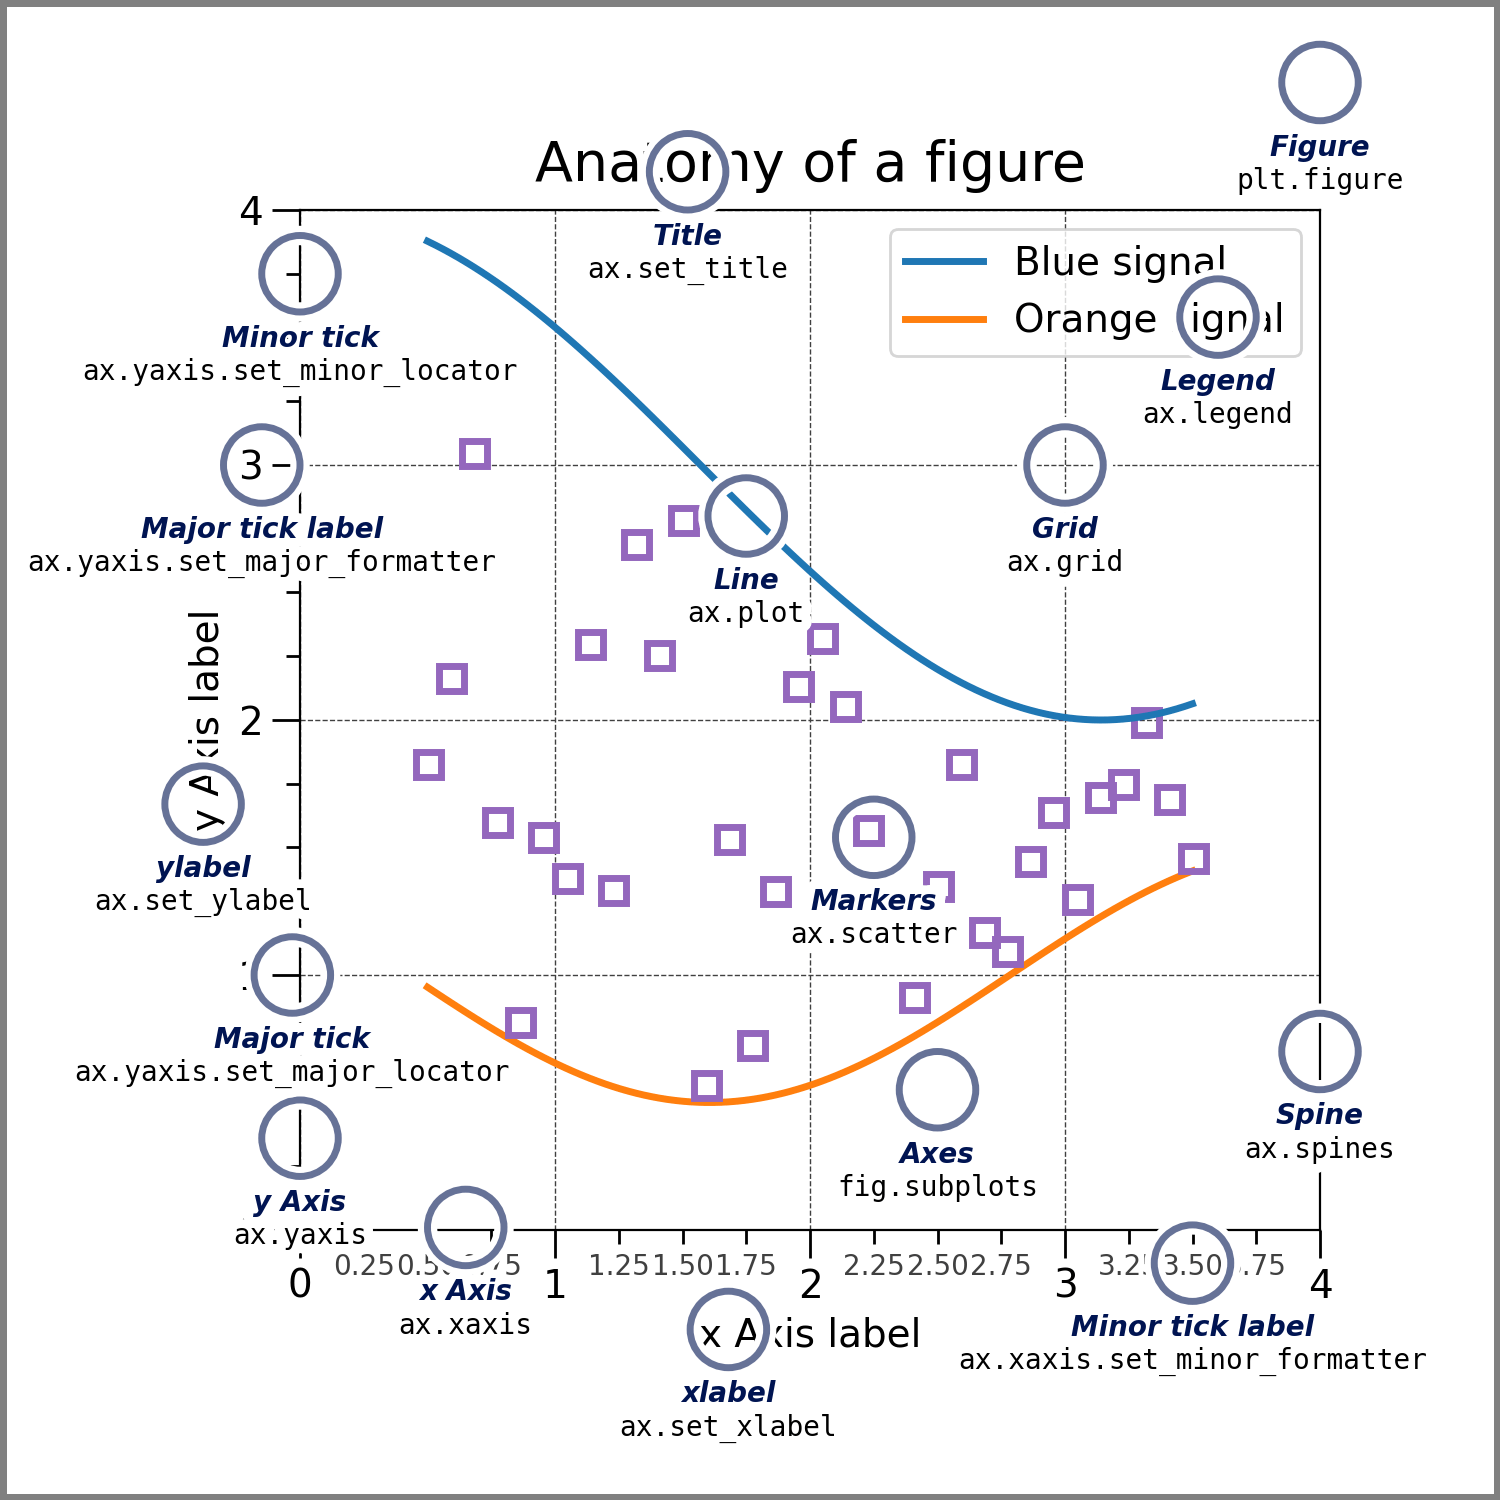

## 图(Figure)
- 整个`Figure`跟踪多个子图`Axes`，它是一个特殊的Artist集合（题目、图例、彩色柱等）、甚至嵌套子图。

<Figure size 640x480 with 0 Axes>

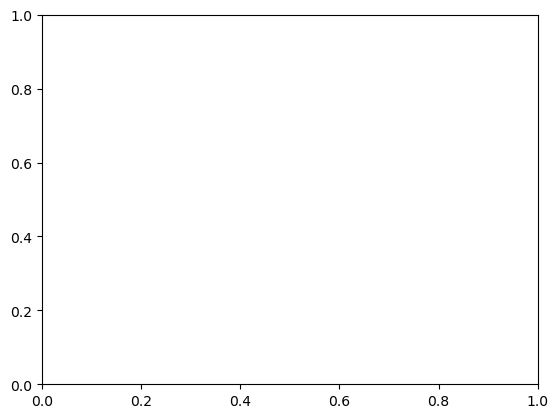

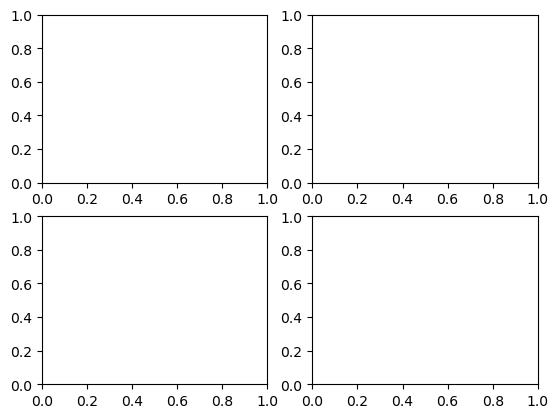

In [9]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

## 子图(Axes)
- 一个`Axes`是一个附着于`Figure`上的`Artist`对象，它包含绘制区域，通常有两个`Axis`对象，该对象有刻度和刻度标签，为`Axes`中的数据提供了标尺。
- 每个`Axes`都有一个标题(`set_title()`)和x轴标签(`set_xlabel()`)和y轴标签(`set_ylabel()`)。
- `Aexs`类及其成员函数是主要操作点，大量绘制方法定义其中。(如`ax.plot()`)

## 轴(Axis)
- `Axis`对象设置标尺、界限和生成刻度、刻度标签。
- `Locator`对象决定刻度位置，`Formatter`对象格式化刻度字符串。二者组合即可完美控制刻度位置和标签。

## 图基(Artist)
- 所有在`Figure`上的可见对象都是`Artist`对象（甚至`Figure`、`Axes`和`Axis`对象)。
- 还有`Text`、`Line2D`、`collections`、`Path`对象。
- 当`Figure`被渲染时，所有`Artist`对象都被画在画布(**canvas**)上。
- 大部分`Artist`对象都绑定在一个`Axes`上面，这样的`Artist`不能被多个`Axes`分享，或者从一个移动到另一个上。

## 绘制函数的输入类型

- 绘图函数需要`numpy.array`或`numpy.ma.masked_array`作为输入，或者能够传入`numpy.asassay`的对象。
- 类似数组的对象，如`pandas`对象和`numpy.matrix`不能有效工作。在绘制前通常需要由`numpy.array`转换。如转换`numpy.matrix`：

In [11]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

大多数方法也可以解析类似`dict`的可寻址对象，如`numpy.recarray`或`pandas.DataFrame`。`Matplotlib`允许你提供一个`data`关键字参数生成图。

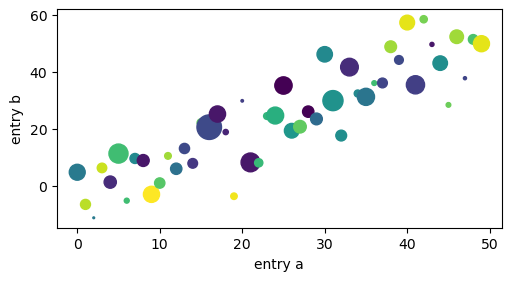

In [16]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

## 编码风格

### 显式和隐式接口

如上所示，实际上使用`Matplotlib`有两类方式：

- 显示生成`Figure`和`Axes`，然后调用它们的方法（即OO风格）；
- 依靠`pyplot`隐式生成和管理`Figure`和`Aexs`，用`pyplot`函数绘图。


下面是OO风格:

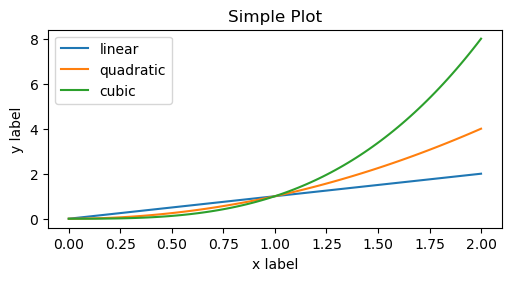

In [17]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

下面是pyplot风格：

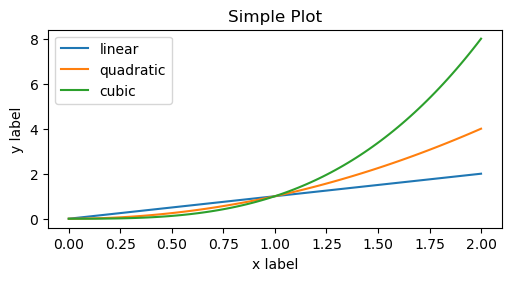

In [18]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

### 撰写带有帮助的函数
如果你需要对不同的数据集绘制相同的图，或简易包装`Matploblib`方法，推荐签名式函数如下：

In [19]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

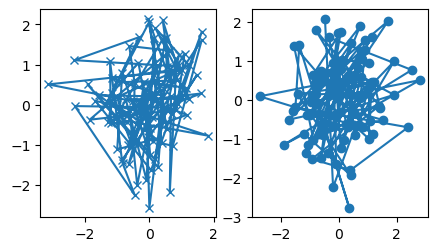

In [20]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

# `Artist`对象的样式

绘图方大多有`Artist`对象的风格选项，可以绘图方法调用时设置，亦可由`setter`设置。下面代码中在`plot`生成图时手动设置`color`、`linewidth`和`linestyle`。然后在生成第二条线后，再用`set_linestyle`设置线型。

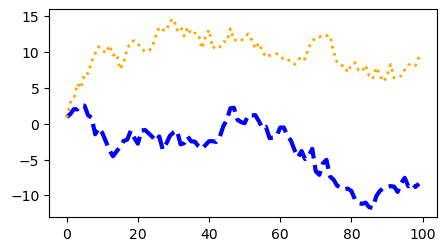

In [25]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');


### 颜色

`Matplotlib`有很多灵活的颜色被大多`Artists`对象接受。见[`colors tutorial`](https://matplotlib.org/stable/tutorials/colors/colors.html)的定义。一些`Artist`可设置多个颜色，如`scatter`图，标记边缘可设置与内部不同的颜色：

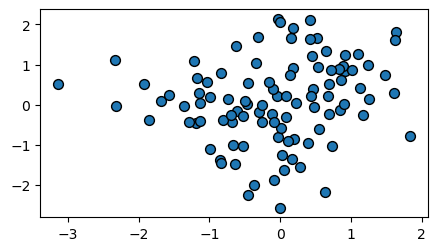

In [27]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

### 线宽、线型、和标记尺寸

- 线宽是典型的印刷点（1 pt = 1/72 inch)，且可有描边线。
- 描边线有线风格，见[linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)。
- 标记尺寸依赖于绘图方法。`plot`以点的大小定义尺寸，通常是标记的直径。`scatter`以和可视区域的大小近似成正比的方式定义尺寸。
- 用户亦可自定义`Markstyle`,见[Marker reference](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html)。

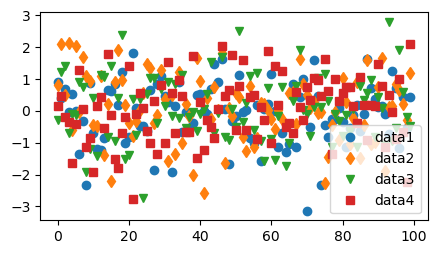

In [30]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

## 标签绘制

### 轴标签和文字

`set_label`、`set_ylabel`和`set_title`用于在预设位置添加文字。文字可直接用`text`添加到图上：

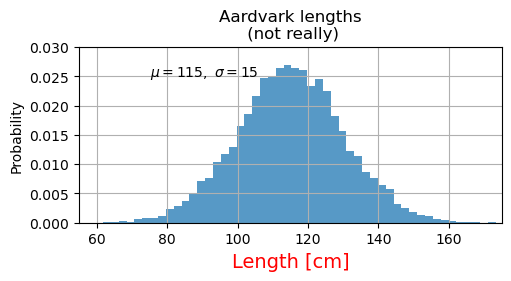

In [32]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]',fontsize=14, color='red')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

### 在文字中使用数学式

- `Matplotlib`接受`TeX`数学表达式，用`$`表包含即可，其中`r`先导字符串表示字符串为`原始字符串`，不会解释为python逃脱符。
- `Matplotlib`有内嵌的`TeX`表达式解释器和排版引擎，自带数学自体，详见[Writing mathematical expressions](https://matplotlib.org/stable/tutorials/text/mathtext.html)。
- 亦可直接用`LaTeX`格式化文字，直接输出到图片之中，见[Text rendering with LaTeX](https://matplotlib.org/stable/tutorials/text/usetex.html)。

### 注释

可以图上加注释，通常会带有一个箭头指向`xy`，在`xytext`上加上一串文字。

在本例中，`xy`和`xytext`采用数据坐标形式，还有其它坐标系统可以选择，见[Basic annotation](https://matplotlib.org/stable/tutorials/text/annotations.html#annotations-tutorial) 和 [Advanced Annotations](https://matplotlib.org/stable/tutorials/text/annotations.html#plotting-guide-annotation)，更多示例见[Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)。

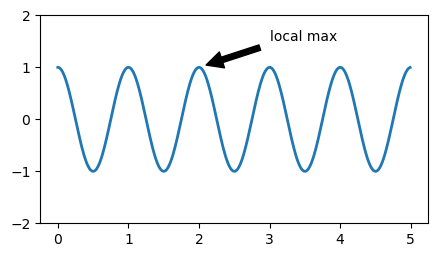

In [35]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.1))

ax.set_ylim(-2, 2);

### 图例

用`Axes.legend`标识线或标记。图例的布局、位置、及所表示的内容很灵活，详见[Legend guide](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html)。

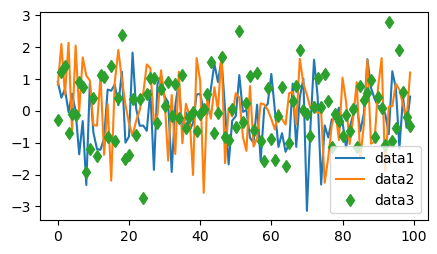

In [36]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

## 轴标尺和刻度

每个`Aexs` 有两个（或三个）`Axis`对象，代表x轴和y轴。它们控制`Axis`的标尺、刻度位置、和刻度格式。

### 标尺

除了线性标尺，`Matploblib`提供了非线性标尺，如`log`标尺。由于`log`标尺非常常用，还有更直接的方法，如`loglog`、`semilogx`和`semilogy`。

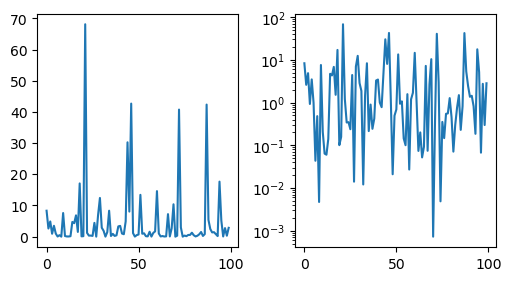

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

标尺将数据值映射以轴上，在两个方向均可实现，将数据进行`transform`。见[Transformations Tutorial](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html)。

### 刻度位置和格式

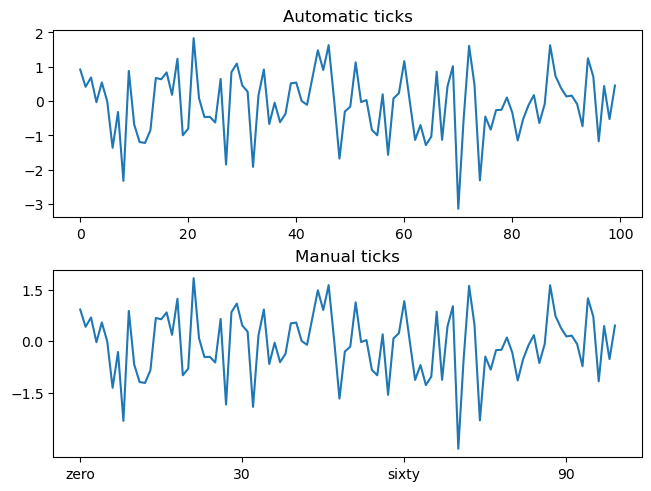

In [47]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks');

不同的标尺可以有不同的位置和格式，如`log`标尺使用`LogLocator`和`LogFormatter`。见[Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html)和[Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html)。

### 绘制日期和字符串

`Matplotlib`可像绘制符点数据那样绘制日期数组和字符串数组。日期刻度更多详见[Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html)。

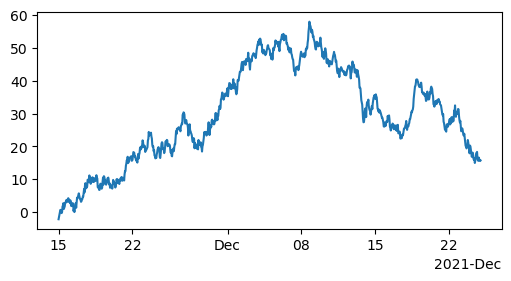

In [48]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

对于字符串，我们可以绘制分类数据图，见[Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)。

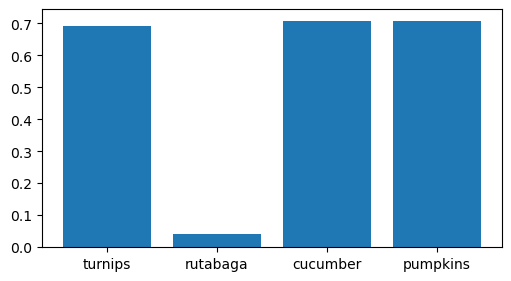

In [49]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

### 附加轴对象

在同一个图中绘制不同尺度的数据需要附加y轴。这样的轴可由`twinx`增加一个看不见的x轴和一个看得见的y轴置于右侧。`twiny`同理。其它示例见[Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)。

同样可以用`secondary_xaxis`和`secondary_yaxis`添加不同尺度的标尺。见[Secondary Axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html)。

Text(0.5, 0, 'Angle [°]')

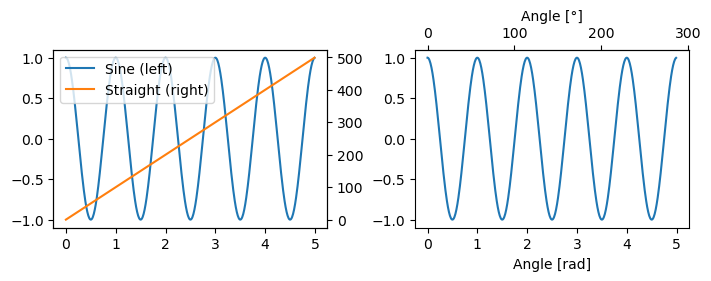

In [50]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## 颜色映射数据

我们经常需要在图中有第三个维度的显示，如在颜色图中的颜色。`Matploblib`有很多此种类型。

Text(0.5, 1.0, 'scatter()')

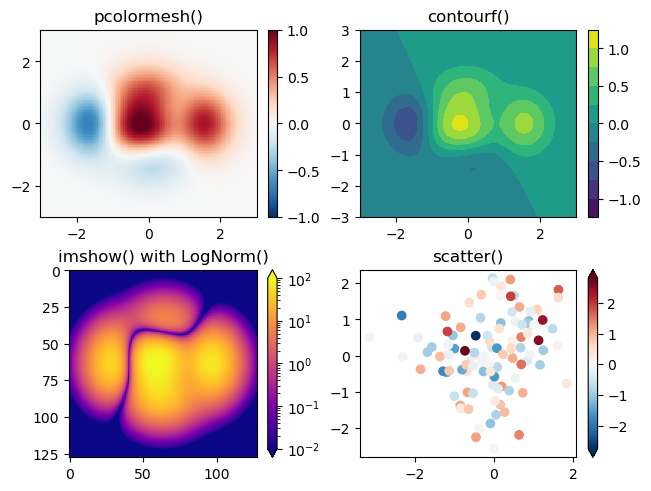

In [53]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma',
                          norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

### 颜色映射

见[Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

### 正则化

见[Colormap Normalization](https://matplotlib.org/stable/tutorials/colors/colormapnorms.html)

### 色柱

添加一个`colorbar`将其它相关颜色与对应数据表达出来。色柱的放置见[Placing Colorbars](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/colorbar_placement.html)

## 多个图和子图

- 生成多个图可以调用`fig = plt.figure()`和`fig2, ax = plt.subplots()`。保留这些对象引用，可以在任一图上添加`Artsis`对象。
- 多个子图可以不同方式实现，最基本的方式就是`plt.subplots()`。
- 可用[`subplot_mosaic`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html#matplotlib.pyplot.subplot_mosaic)实现更复杂的布局。

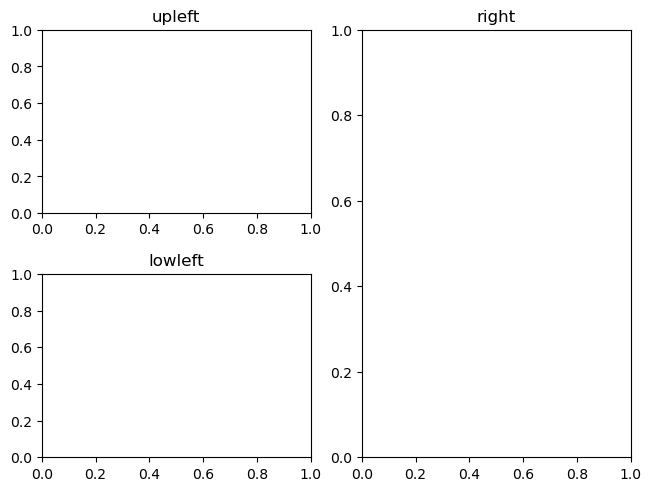

In [55]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right');

## 绘图类型

见[Plot types](https://matplotlib.org/stable/plot_types/index.html)